# Torch basics

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

Construct a 5x3 matrix, uninitialized:

In [2]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00  0.0000e+00  6.6268e+26
 4.5907e-41  1.7924e+03  4.5907e-41
 1.5294e-38  0.0000e+00  1.5294e-38
 0.0000e+00  1.2319e+33  4.5907e-41
 2.7211e+32  4.5907e-41  6.6388e+26
[torch.FloatTensor of size 5x3]



In [3]:
print(x.size())

torch.Size([5, 3])


### Bridge to numpy

In [4]:
y = x.numpy()
print(y)

[[  0.00000000e+00   0.00000000e+00   6.62680834e+26]
 [  4.59065377e-41   1.79239551e+03   4.59065377e-41]
 [  1.52944665e-38   0.00000000e+00   1.52943768e-38]
 [  0.00000000e+00   1.23189085e+33   4.59065377e-41]
 [  2.72112683e+32   4.59065377e-41   6.63882676e+26]]


In [5]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(b)


 1
 1
 1
 1
 1
[torch.DoubleTensor of size 5]



In [6]:
xr = torch.rand(5, 3)
print(xr)


 0.1864  0.6903  0.3094
 0.4084  0.8901  0.7136
 0.3964  0.4536  0.7637
 0.8650  0.4492  0.0317
 0.1319  0.6296  0.6056
[torch.FloatTensor of size 5x3]



In [7]:
print(x+xr)


 1.8643e-01  6.9029e-01  6.6268e+26
 4.0836e-01  1.7933e+03  7.1363e-01
 3.9639e-01  4.5364e-01  7.6368e-01
 8.6497e-01  1.2319e+33  3.1659e-02
 2.7211e+32  6.2960e-01  6.6388e+26
[torch.FloatTensor of size 5x3]



In [8]:
x.add_(xr)
print(x)


 1.8643e-01  6.9029e-01  6.6268e+26
 4.0836e-01  1.7933e+03  7.1363e-01
 3.9639e-01  4.5364e-01  7.6368e-01
 8.6497e-01  1.2319e+33  3.1659e-02
 2.7211e+32  6.2960e-01  6.6388e+26
[torch.FloatTensor of size 5x3]



Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.copy_(y)```, ```x.t_()```, will change ```x```.

Also be careful, changing the torch tensor modify the numpy array and vice-versa...

In [9]:
print(y)

[[  1.86434373e-01   6.90285444e-01   6.62680834e+26]
 [  4.08362448e-01   1.79328552e+03   7.13625431e-01]
 [  3.96388501e-01   4.53640759e-01   7.63684034e-01]
 [  8.64966512e-01   1.23189085e+33   3.16592120e-02]
 [  2.72112683e+32   6.29596889e-01   6.63882676e+26]]


In [10]:
np.add(a, 1, out=a)
print(b)


 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [11]:
if torch.cuda.is_available():
    x = x.cuda()
    y = torch.from_numpy(y).cuda()
    print(x + y)


 3.7287e-01  1.3806e+00  1.3254e+27
 8.1672e-01  3.5866e+03  1.4273e+00
 7.9278e-01  9.0728e-01  1.5274e+00
 1.7299e+00  2.4638e+33  6.3318e-02
 5.4423e+32  1.2592e+00  1.3278e+27
[torch.cuda.FloatTensor of size 5x3 (GPU 0)]



# Autograd: automatic differentiation

In [12]:
from torch.autograd import Variable

```autograd.Variable``` is a key class in pytorch. It wraps around a Tensor and supports most operations defined on it.

In [13]:
x = Variable(torch.ones(2, 2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



The wrapped Tensor can be accessed through the ```.data``` attribute.

In [14]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [15]:
y = x + 2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [16]:
print(y.grad_fn)

In [17]:
z = y * y * 3
out = z.mean()

print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



After the computation is finished, i.e. _forward pass_, you can call ```.backward()``` and have all the gradients computed automatically.

In [18]:
out.backward(retain_graph=True)

The gradients w.r.t. this variable is accumulated into ```.grad```.

In [19]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



Let’s call the ``out``
*Variable* “$o$”.
We have that:

$o = \frac{1}{4}\sum_i z_i$ 

$z_i = 3(x_i+2)^2$ 

$z_i\bigr\rvert_{x_i=1} = 27$.

Taking partial derivatives give:
$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2)$, hence
$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.

In [20]:
print(z.grad)

None


In [21]:
out.backward(torch.Tensor([2.0]),retain_graph=True)

In [22]:
print(x.grad)

Variable containing:
 13.5000  13.5000
 13.5000  13.5000
[torch.FloatTensor of size 2x2]



In [23]:
# Manually zero the gradients after updating weights
x.grad.data.zero_()


 0  0
 0  0
[torch.FloatTensor of size 2x2]

The gradients must be set to zero manually. Otherwise they will cumulate across several _.backward()_ calls. 
This functionality is useful for Recurrent Neural Networks, but otherwise needs to be zeroed at each iteration.

In [24]:
out.backward()

In [25]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



# Playing with pytorch: linear regression

## Warm-up: Linear regression with numpy

Our model is:
$$
y_t = 2x^1_t-3x^2_t+1, \quad t\in\{1,\dots,30\}
$$

Our task is given the 'observations' $(x_t,y_t)_{t\in\{1,\dots,30\}}$ to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$.

In order to do so, we will solve the following optimization problem:
$$
\underset{w^1,w^2,b}{\operatorname{argmin}} \sum_{t=1}^{30} \left(w^1x^1_t+w^2x^2_t+b-y_t\right)^2
$$

In [26]:
import numpy as np
from numpy.random import random
# generate random input data
x = random((30,2))

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

In [27]:
x[:5]

array([[ 0.19593226,  0.00858643],
       [ 0.00785347,  0.93708947],
       [ 0.70909722,  0.70946871],
       [ 0.26526523,  0.81703895],
       [ 0.9884329 ,  0.333816  ]])

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    #elev = -.5
    #azim = 0
    #plot_figs(2, elev, azim, x, y, w, b[0])

    #elev = -.5
    #azim = 90
    #plot_figs(3, elev, azim, x, y, w, b[0])

    plt.show()

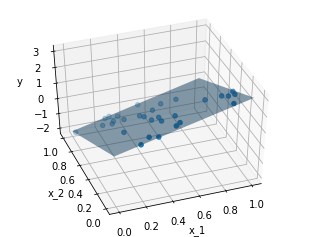

In [29]:
plot_views(x, y, w_source, b_source)

In vector form, we define:
$$
\hat{y}_t = {\bf w}^T{\bf x}_t+b
$$
and we want to minimize the loss given by:
$$
loss = \sum_t\underbrace{\left(\hat{y}_t-y_t \right)^2}_{loss_t}.
$$

To minimize the loss we first compute the gradient of each $loss_t$:
\begin{eqnarray*}
\frac{\partial{loss_t}}{\partial w^1} &=& 2x^1_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial w^2} &=& 2x^2_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial b} &=& 2\left({\bf w}^T{\bf x}_t+b-y_t \right)
\end{eqnarray*}

For one epoch, **Stochastic Gradient Descent with minibatches of size 1** then updates the weigts and bias by running the following loop: 

for $t \in \{1,\dots,30\}$, 

\begin{eqnarray*}
w^1_{t+1}&=&w^1_{t}-\alpha\frac{\partial{loss_t}}{\partial w^1} \\
w^2_{t+1}&=&w^2_{t}-\alpha\frac{\partial{loss_t}}{\partial w^2} \\
b_{t+1}&=&b_{t}-\alpha\frac{\partial{loss_t}}{\partial b},
\end{eqnarray*}

if $t = 30$, set $w^1_1=w^1_{31}$, $w^2_1 = w^2_{31}$ and $b_1=b_{31}$.

$\alpha>0$ is called the learning rate.

Then we run several epochs...

In [30]:
# randomly initialize learnable weights and bias
w_init = random(2)
b_init = random(1)

w = w_init
b = b_init
print("initial values of the parameters:", w, b )


# our model forward pass
def forward(x):
    return x.dot(w)+b

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2 

print("initial loss:", np.sum([loss(x_val,y_val) for x_val, y_val in zip(x, y)]) )

# compute gradient
def gradient(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*(x.dot(w)+b - y)*x, 2 * (x.dot(w)+b - y)
 
learning_rate = 1e-2
# Training loop with minibatch (of size 1)
for epoch in range(10):
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w, grad_b = gradient(x_val, y_val)
        w = w - learning_rate * grad_w
        b = b - learning_rate * grad_b
        l += loss(x_val, y_val)

    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b )

initial values of the parameters: [ 0.48974534  0.69560455] [ 0.18313882]
initial loss: 58.7667201893
progress: epoch: 0 loss 50.3585679837
progress: epoch: 1 loss 42.240269629
progress: epoch: 2 loss 36.5842228501
progress: epoch: 3 loss 31.8707635329
progress: epoch: 4 loss 27.7978916247
progress: epoch: 5 loss 24.257199824
progress: epoch: 6 loss 21.1764831687
progress: epoch: 7 loss 18.495642058
progress: epoch: 8 loss 16.1625671716
progress: epoch: 9 loss 14.1318842145
estimation of the parameters: [ 1.44507238 -1.06199437] [ 0.22726699]


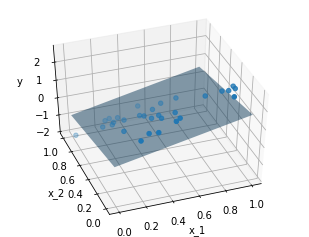

In [31]:
plot_views(x, y, w, b)

Note that the actual gradient of the loss is given by:
$$
\frac{\partial{loss}}{\partial w^1} =\sum_t \frac{\partial{loss_t}}{\partial w^1},\quad
\frac{\partial{loss}}{\partial w^2} =\sum_t \frac{\partial{loss_t}}{\partial w^2},\quad
\frac{\partial{loss}}{\partial b} =\sum_t \frac{\partial{loss_t}}{\partial b}
$$

For one epoch, **(Batch) Gradient Descent** updates the weights and bias as follows:
\begin{eqnarray*}
w^1_{new}&=&w^1_{old}-\alpha\frac{\partial{loss}}{\partial w^1} \\
w^2_{new}&=&w^2_{old}-\alpha\frac{\partial{loss}}{\partial w^2} \\
b_{new}&=&b_{old}-\alpha\frac{\partial{loss}}{\partial b},
\end{eqnarray*}

and then we run several epochs.

In [32]:
w = w_init
b = b_init
print("initial values of the parameters:", w, b )

learning_rate = 1e-2
# Training loop
for epoch in range(10):
    grad_w = np.array([0,0])
    grad_b = np.array(0)
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w = np.add(grad_w,gradient(x_val, y_val)[0])
        grad_b = np.add(grad_b,gradient(x_val, y_val)[1])
        l += loss(x_val, y_val)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b
    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b)

initial values of the parameters: [ 0.48974534  0.69560455] [ 0.18313882]
progress: epoch: 0 loss 58.7667201893
progress: epoch: 1 loss 46.5038199336
progress: epoch: 2 loss 40.3795192579
progress: epoch: 3 loss 35.1053382558
progress: epoch: 4 loss 30.5313447552
progress: epoch: 5 loss 26.5639032532
progress: epoch: 6 loss 23.1221728456
progress: epoch: 7 loss 20.136104354
progress: epoch: 8 loss 17.544997048
progress: epoch: 9 loss 15.2962504794
estimation of the parameters: [ 1.46419159 -1.08035034] [ 0.23311793]


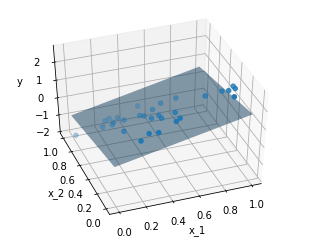

In [33]:
plot_views(x, y, w, b)

## Linear regression with tensors

In [34]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

In [35]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

This is an implementation of **(Batch) Gradient Descent** with tensors.

Note that in the main loop, the functions loss_t and gradient_t are always called with the same inputs: they can easily be incorporated into the loop (we'll do that below).

In [36]:
w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print("initial values of the parameters:", w_t, b_t )

# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

learning_rate = 1e-2
for epoch in range(10):
    l_t = loss_t(x_t,y_t)
    grad_w, grad_b = gradient_t(x_t,y_t)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l_t)

# After training
print("estimation of the parameters:", w_t, b_t )

initial values of the parameters: 
 0.4897
 0.6956
[torch.FloatTensor of size 2x1]
 
 0.1831
[torch.FloatTensor of size 1x1]

progress: epoch: 0 loss 58.76671998668462
progress: epoch: 1 loss 46.50382127612829
progress: epoch: 2 loss 40.379520579241216
progress: epoch: 3 loss 35.10533951083198
progress: epoch: 4 loss 30.531344923423603
progress: epoch: 5 loss 26.563903820351698
progress: epoch: 6 loss 23.122174615011318
progress: epoch: 7 loss 20.1361059701922
progress: epoch: 8 loss 17.544998457611655
progress: epoch: 9 loss 15.296252027445007
estimation of the parameters: 
 1.4642
-1.0804
[torch.FloatTensor of size 2x1]
 
 0.2331
[torch.FloatTensor of size 1x1]



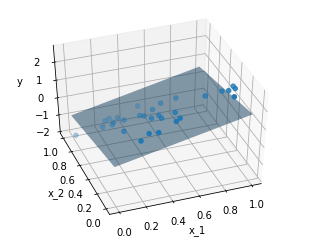

In [37]:
plot_views(x, y, w_t.numpy(), b_t.numpy())

## Linear regression with Autograd

In [38]:
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Variables during the backward pass.
x_v = Variable(x_t, requires_grad=False)
y_v = Variable(y_t, requires_grad=False)

In [39]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
w_v = Variable(w_init_t.clone().unsqueeze(1),requires_grad=True)
b_v = Variable(b_init_t.clone().unsqueeze(1),requires_grad=True)
print("initial values of the parameters:", w_v.data, b_v.data )

initial values of the parameters: 
 0.4897
 0.6956
[torch.FloatTensor of size 2x1]
 
 0.1831
[torch.FloatTensor of size 1x1]



An implementation of **(Batch) Gradient Descent** without computing explicitly the gradient and using autograd instead.

In [40]:
for epoch in range(10):
    y_pred = x_v.mm(w_v)+b_v
    loss = (y_pred - y_v).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to w and b respectively.
    loss.backward()
    # Update weights using gradient descent; w.data and b.data are Tensors,
    # w.grad and b.grad are Variables and w.grad.data and b.grad.data are
    # Tensors.
    w_v.data -= learning_rate * w_v.grad.data
    b_v.data -= learning_rate * b_v.grad.data
    
    # Manually zero the gradients after updating weights
    # otherwise gradients will be acumulated after each .backward()
    w_v.grad.data.zero_()
    b_v.grad.data.zero_()
    
    print("progress:", "epoch:", epoch, "loss",loss.data[0])

# After training
print("estimation of the parameters:", w_v.data, b_v.data.t() )

progress: epoch: 0 loss 58.766719818115234
progress: epoch: 1 loss 46.503822326660156
progress: epoch: 2 loss 40.379520416259766
progress: epoch: 3 loss 35.10533905029297
progress: epoch: 4 loss 30.53134536743164
progress: epoch: 5 loss 26.56390380859375
progress: epoch: 6 loss 23.122175216674805
progress: epoch: 7 loss 20.136106491088867
progress: epoch: 8 loss 17.544998168945312
progress: epoch: 9 loss 15.296252250671387
estimation of the parameters: 
 1.4642
-1.0804
[torch.FloatTensor of size 2x1]
 
 0.2331
[torch.FloatTensor of size 1x1]



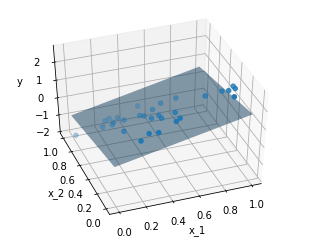

In [41]:
plot_views(x, y, w_v.data.numpy(), b_v.data.numpy())

## Linear regression with neural network

An implementation of **(Batch) Gradient Descent** using the nn package. Here we have a super simple model with only one layer and no activation function!

In [42]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(size_average=False)

# switch to train mode
model.train()

for epoch in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x_v)
  
    # Note this operation is equivalent to: pred = model.forward(x_v)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y_v)

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Variable, so
    # we can access its data and gradients like we did before.
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data
        
    print("progress:", "epoch:", epoch, "loss",loss.data[0])

# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 58.766719818115234
progress: epoch: 1 loss 46.50382614135742
progress: epoch: 2 loss 40.379520416259766
progress: epoch: 3 loss 35.105342864990234
progress: epoch: 4 loss 30.531347274780273
progress: epoch: 5 loss 26.56390380859375
progress: epoch: 6 loss 23.122177124023438
progress: epoch: 7 loss 20.136106491088867
progress: epoch: 8 loss 17.545000076293945
progress: epoch: 9 loss 15.29625129699707
estimation of the parameters:
Parameter containing:
 1.4642 -1.0804
[torch.FloatTensor of size 1x2]

Parameter containing:
 0.2331
[torch.FloatTensor of size 1]



Last step, we use directly the optim package to update the weights and bias.

In [43]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(size_average=False)

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(10):
    y_pred = model(x_v)
    loss = loss_fn(y_pred, y_v)
    print("progress:", "epoch:", epoch, "loss",loss.data[0])
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

progress: epoch: 0 loss 58.766719818115234
progress: epoch: 1 loss 46.50382614135742
progress: epoch: 2 loss 40.379520416259766
progress: epoch: 3 loss 35.105342864990234
progress: epoch: 4 loss 30.531347274780273
progress: epoch: 5 loss 26.56390380859375
progress: epoch: 6 loss 23.122177124023438
progress: epoch: 7 loss 20.136106491088867
progress: epoch: 8 loss 17.545000076293945
progress: epoch: 9 loss 15.29625129699707
estimation of the parameters:
Parameter containing:
 1.4642 -1.0804
[torch.FloatTensor of size 1x2]

Parameter containing:
 0.2331
[torch.FloatTensor of size 1]



## Exercise 1: Play with the code

Change the number of samples from 30 to 300. What happens? How to correct it?

In the initialization phase, remove the .clone() What happens? Why?

## Exercise 2: Logistic regression

Sigmoid function:
$$
\sigma(y) = \frac{1}{1+e^{-y}}
$$

The model is now
$$
Z_t = Ber(\sigma(y_t)), \quad t\in\{1,\dots,30\},
$$
and the task is still to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$ but now from the observations $(x_t,Z_t)_{t\in \{1,\dots,30\}}$.

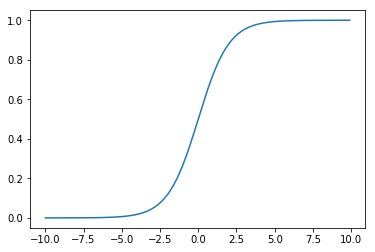

In [44]:
from scipy.special import expit
xaxis = np.arange(-10.0, 10.0, 0.1)
plt.plot(xaxis,[expit(x) for x in xaxis]);

You might need to install scipy first by runing:

$ pip3 install scipy

In [45]:
from scipy.stats import bernoulli
Z = bernoulli.rvs(expit(y))

What is an appropriate loss function now?